# Problem Statment 

The dataset utilizes data from Human resources analytics dataset in order to make algorithm that predict which employee leave next from compony with help of differnt factors .

the dataset contains factors : satisfaction_level,last_evaluatio ,number_project ,average_montly_hours ,time_spend_company ,Work_accident ,left, promotion_last_5years ,Department and salary

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stat
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [3]:
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


The data set featuers are numeric except Department and salary so we need to convert them in number.

In [4]:
df['Department']= pd.factorize(df['Department'])[0]
df['salary']= pd.factorize(df['salary'])[0]


In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,4,0
14995,0.37,0.48,2,160,3,0,1,0,4,0
14996,0.37,0.53,2,143,3,0,1,0,4,0
14997,0.11,0.96,6,280,4,0,1,0,4,0


# Exploratory data analysis

In [6]:
#cheking dimention of dataset
df.shape

(14999, 10)

In [7]:
#cheking type of dataset
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                 int64
salary                     int64
dtype: object

In [8]:
#to get good overviews of data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  int64  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


So there is no null value in dataset

In [9]:
#checking number of unique values in dataset
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

So above are the number of unique values that each column has.

<AxesSubplot:>

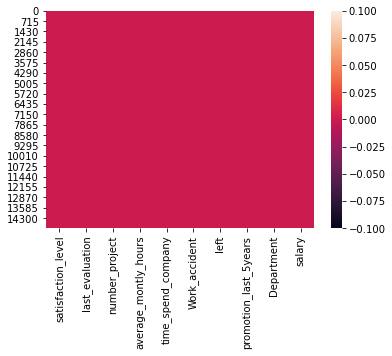

In [10]:
#since our dataset in cleaned that is no null value in the data set lets visualize this by heat map.
#Lets visualize null value clearly
sns.heatmap(df.isnull())

so clear that no missing value is present

Check correlation between features

In [11]:
#cheking which columns are present in dataset
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [12]:
#cheking weather the dataset contains any spaces
df.loc[df["satisfaction_level"]==""]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


It seems there is no spaces in dataset

# Description of Data set

In [13]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.339823,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.820837,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


This gives statistical information of the dataset.There is no any negative or invalid values in dataset. so from above we can conclude There is no any null value since the count of all columns is same.

There is no any null value since the count of all columns is same.

<AxesSubplot:>

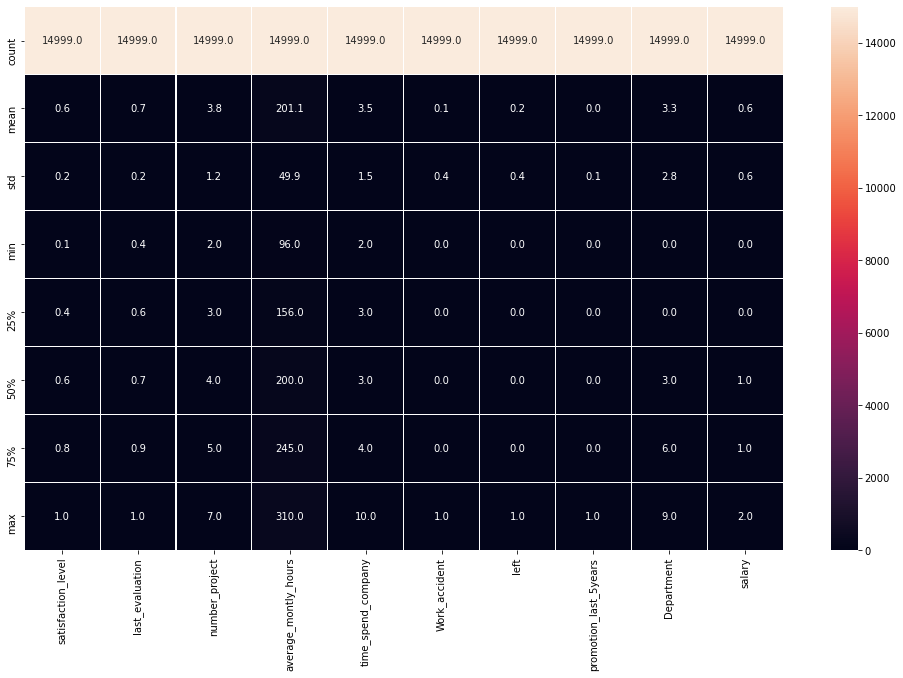

In [14]:
#visalizing from column from heatmap
plt.figure(figsize=(17,10))
sns.heatmap(df.describe(),linewidth=0.1,fmt="0.1f",annot=True)

This is hest map to visualize the summary statistics

# DATA VISUALIZATION

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

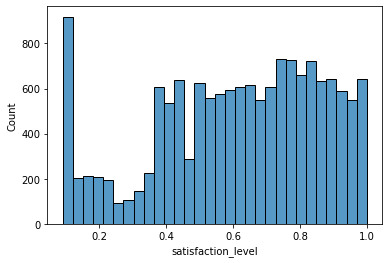

In [15]:
sns.histplot(df["satisfaction_level"])

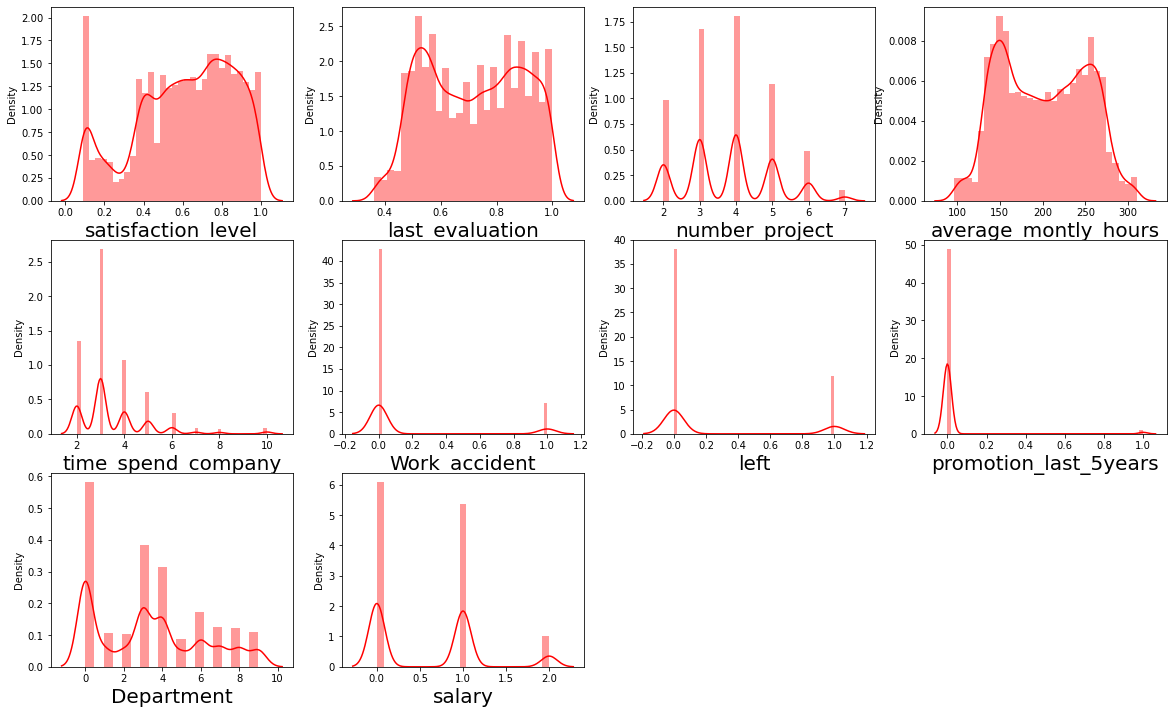

In [16]:
#how data is distributed to each colomn
plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color = 'r')
        plt.xlabel(column,fontsize = 20)
        plotnumber+=1
plt.show()

We can observ that most of the columns are distributed and them have skewness too.

In [17]:
#lets check the correlation 
cor = df.corr()
cor

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
Department,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


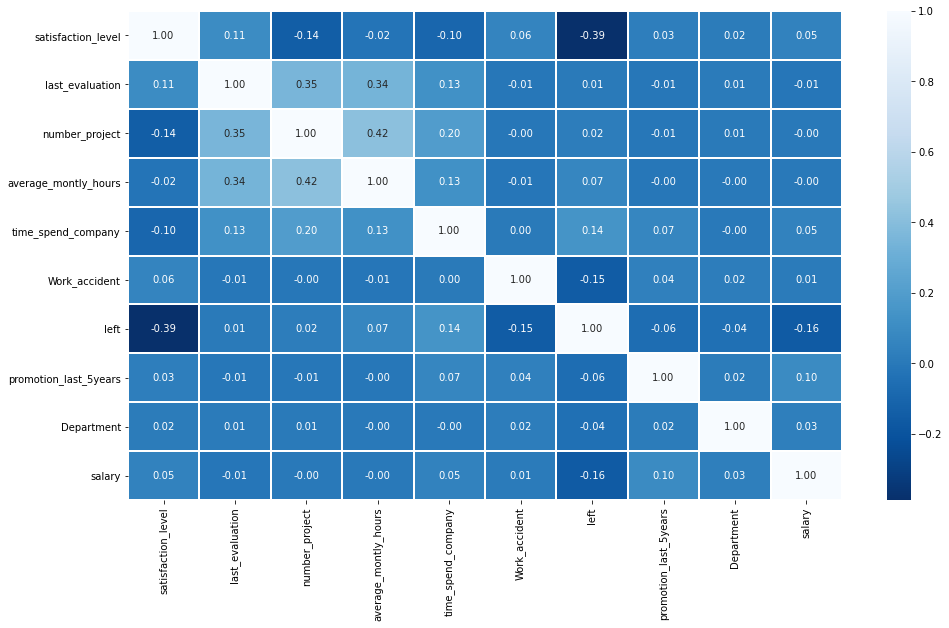

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths =1 ,fmt ='0.2f',cmap="Blues_r", annot=True )
plt.yticks(rotation=0);

From above it is clear tat people who lest has low satisfaction levle ,had low salary and nuber of years spend in the compony is highh,so we can conclude that componay has lossing experience employee due to low salary low satisfaction level.

In [19]:
corr_left = pd.DataFrame(cor['left'].drop('left').sort_values(ascending=False))
corr_left
                         
                    

,left
time_spend_company,0.144822
average_montly_hours,0.071287
number_project,0.023787
last_evaluation,0.006567
Department,-0.043814
promotion_last_5years,-0.061788
Work_accident,-0.154622
salary,-0.157898
satisfaction_level,-0.388375


Text(0, 0.5, 'left')

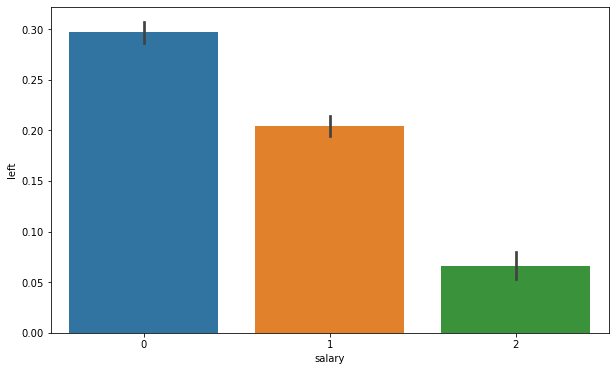

In [20]:
#Lest visualize some intresting features 
#cheking relarion between two variables
plt.figure(figsize=[10,6])

sns.barplot(df['salary'],df['left']);
plt.xlabel("salary")
plt.ylabel("left")

We can see people with less salary are more likely to leave compony

In [21]:
plot_features = ['last_evaluation','satisfaction_level','time_spend_company']

In [22]:
for pf in plot_features:
    g = maps.FacetGrid(employees, hue="left")
    g.map(maps.kdeplot,pf,shade= True)
    g.set(xlim=(0, employees[pf].max()))
    g.add_legend()

NameError: name 'maps' is not defined

# Preprocessing data

Seperating Dependent and Independent variable

In [ ]:
x = df.drop("left",axis=1)
y = df["left"]

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
x.head()

In [ ]:
feature_names = list(df.axes[1])

In [ ]:
#Standard Scalarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

In [ ]:
#finding varience inflation factor in each scaled column 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"]=x.columns
vif


values are less than 10 we can move model building

In [ ]:
#dataset
x.head()

# Modelling

Finding best random state

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)

# Regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix,precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [ ]:

x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.15, random_state=123 , stratify=y)

In [ ]:
# create base rate model
def base_rate_model(X):
    y=np.zeros(X.shape[0])
    return y

In [ ]:
#chek accuracy of base rate model
y_base_rate = base_rate_model(x_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

In [ ]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

In [ ]:
#check accuracy of logistic model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2',C=1)
model.fit(x_train,y_train)
print("logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(x_test)))

In [ ]:
logit_roc_auc = roc_auc_score(y_test,logis.predict(x_test))

In [ ]:
#compare the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test,base_rate_model(x_test))
print ("Base Rate AUC = %2.2f"% base_roc_auc)
print (classification_report(y_test,base_rate_model(x_test)))

#By adding in "class_weight = balnced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(x_train, y_train)
print("\n\n---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test,logis.predict(x_test))
print("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(x_test)))


In [ ]:
#Decision tree model
dtree = tree.DecisionTreeClassifier(
     #max_depth=3,
     class_weight="balanced",
     min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(x_train,y_train)
print("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(x_test))
print ("Decision Tree AUC = %2.2f"% dt_roc_auc)
print(classification_report(y_test, dtree.predict(x_test)))


In [ ]:
#Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=10,
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02
    )
rf.fit(x_train, y_train)
print("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test,rf.predict(x_test))
print("Random Forest AUC = %2.2f"% rf_roc_auc)
print(classification_report(y_test, rf.predict(x_test)))

In [ ]:
#Ada Boost
ada = AdaBoostClassifier(n_estimators = 400, learning_rate=0.1)
ada.fit(x_train,y_train)
print("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test,ada.predict(x_test))
print("AdaBoost AUC = %2.2f"% ada_roc_auc)
print(classification_report(y_test,ada.predict(x_test)))


In [ ]:
#Create Roc graph
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test, logis.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(x_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds= roc_curve(y_test, ada.predict_proba(x_test)[:,1])

plt.figure()

# Plot logistic Regression ROC
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)'% logit_roc_auc)

# Plot Random Forest  ROC 
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest (area = %0.2f)'%rf_roc_auc)

#Plot Decision Tree ROC 
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)'%dt_roc_auc)

#plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='Adaboost (area=%0.2f)'% ada_roc_auc)
 #plot Base Rate ROC 
plt.plot([0,1],[0,1],label='Base Rate' 'k--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()